# Mobile Price Prediction
This project utilizes linear regression techniques to predict the price of mobile phones based on various features. The goal of the project is to develop a predictive model that can assist both buyers and sellers in determining the appropriate pricing for mobile devices.

Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and CPU power. In this dataset, we want to estimate the price of mobile phones using the above features.

Dataset:<br>
https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction

#### Data Acquisition

Creating a linear regression model in Python using the scikit-learn package on a Mobile Price Prediction Dataset from Kaggle

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
# Read dataset
data = pd.read_csv('Cellphone.csv')

In [3]:
# Quick View about the Dataset
data

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [4]:
# Print the first 10 rows of the data
data.head(10)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [5]:
# Print the last 10 rows of the data
data.tail(10)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
151,851,3055,2173,158.0,5.50,401,4,1.875,64.0,6.0,16.0,8.0,3000,7.4
152,290,4361,3248,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
153,290,4361,3291,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
154,1131,2536,3619,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4
155,1206,3551,4408,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [6]:
# Print the number of rows and columns
data.shape

(161, 14)

In [7]:
# Print the statistical analysis
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [8]:
# Data Cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


#### Data Visualization

We will be using Scatter plots. They will observe the relationship between variables and uses dots to represent the connection between them.

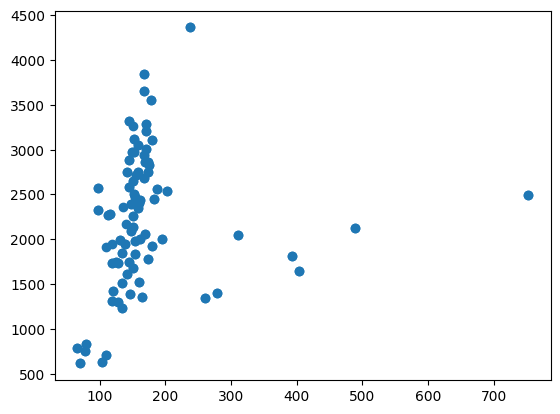

In [11]:
plt.scatter(data["weight"], data["Price"])

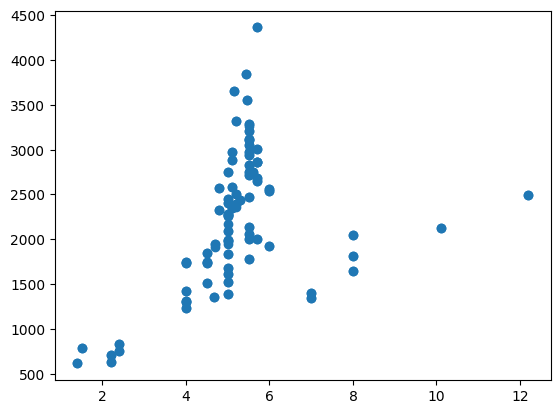

In [12]:
plt.scatter(data["resoloution"], data["Price"])

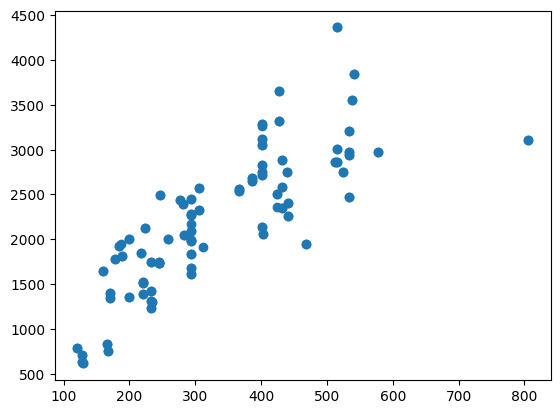

In [13]:
plt.scatter(data["ppi"], data["Price"])

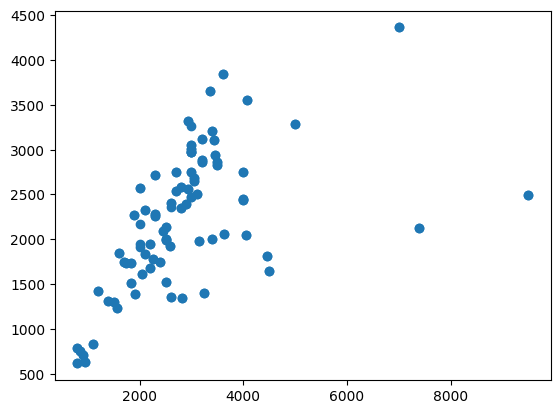

In [14]:
plt.scatter(data["battery"], data["Price"])

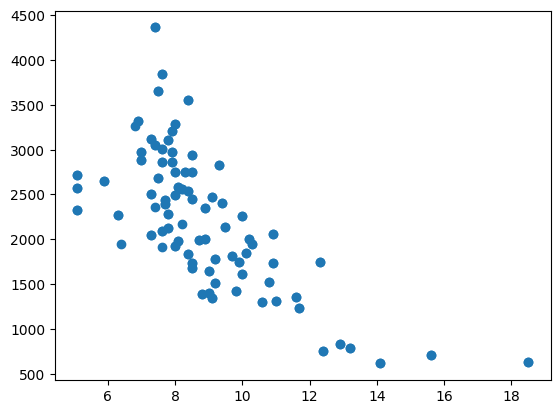

In [15]:
plt.scatter(data["thickness"], data["Price"])

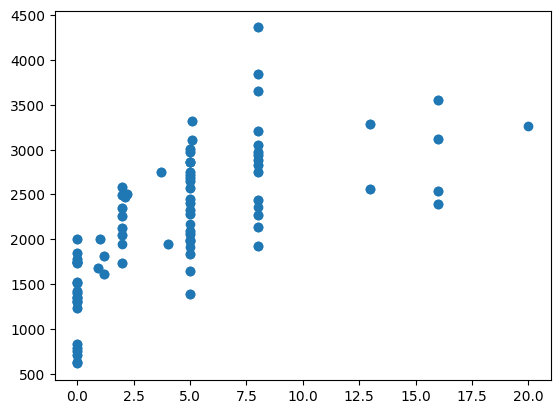

In [16]:
plt.scatter(data["Front_Cam"], data["Price"])

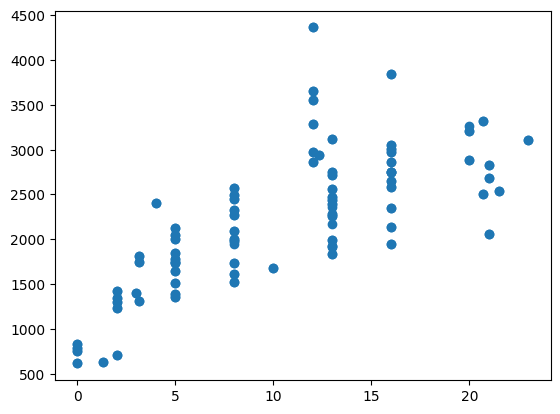

In [17]:
plt.scatter(data["RearCam"], data["Price"])

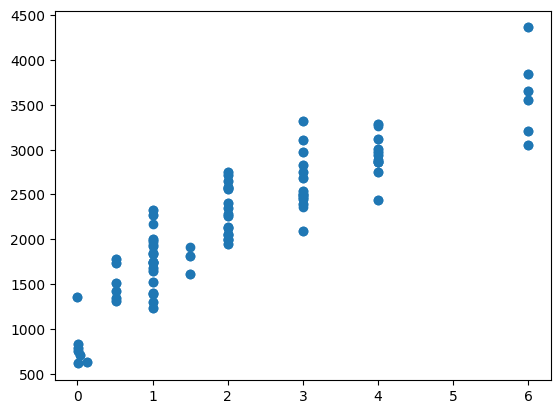

In [18]:
plt.scatter(data["ram"], data["Price"])

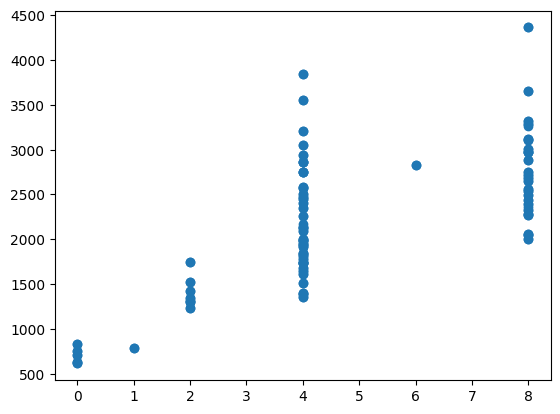

In [19]:
plt.scatter(data["cpu core"], data["Price"])

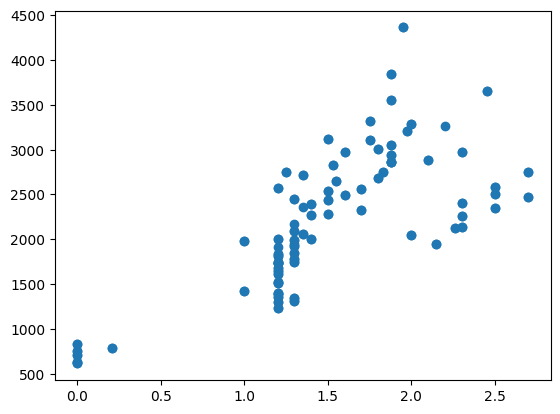

In [20]:
plt.scatter(data["cpu freq"], data["Price"])

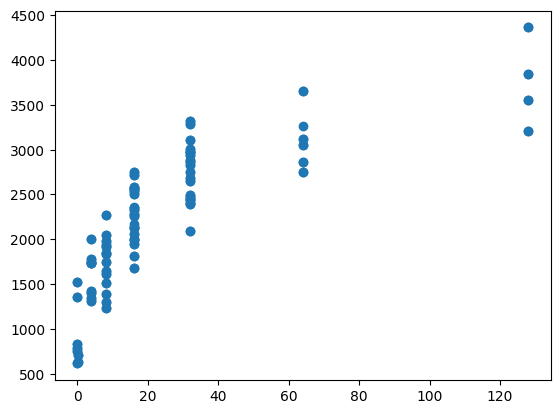

In [21]:
plt.scatter(data["internal mem"], data["Price"])

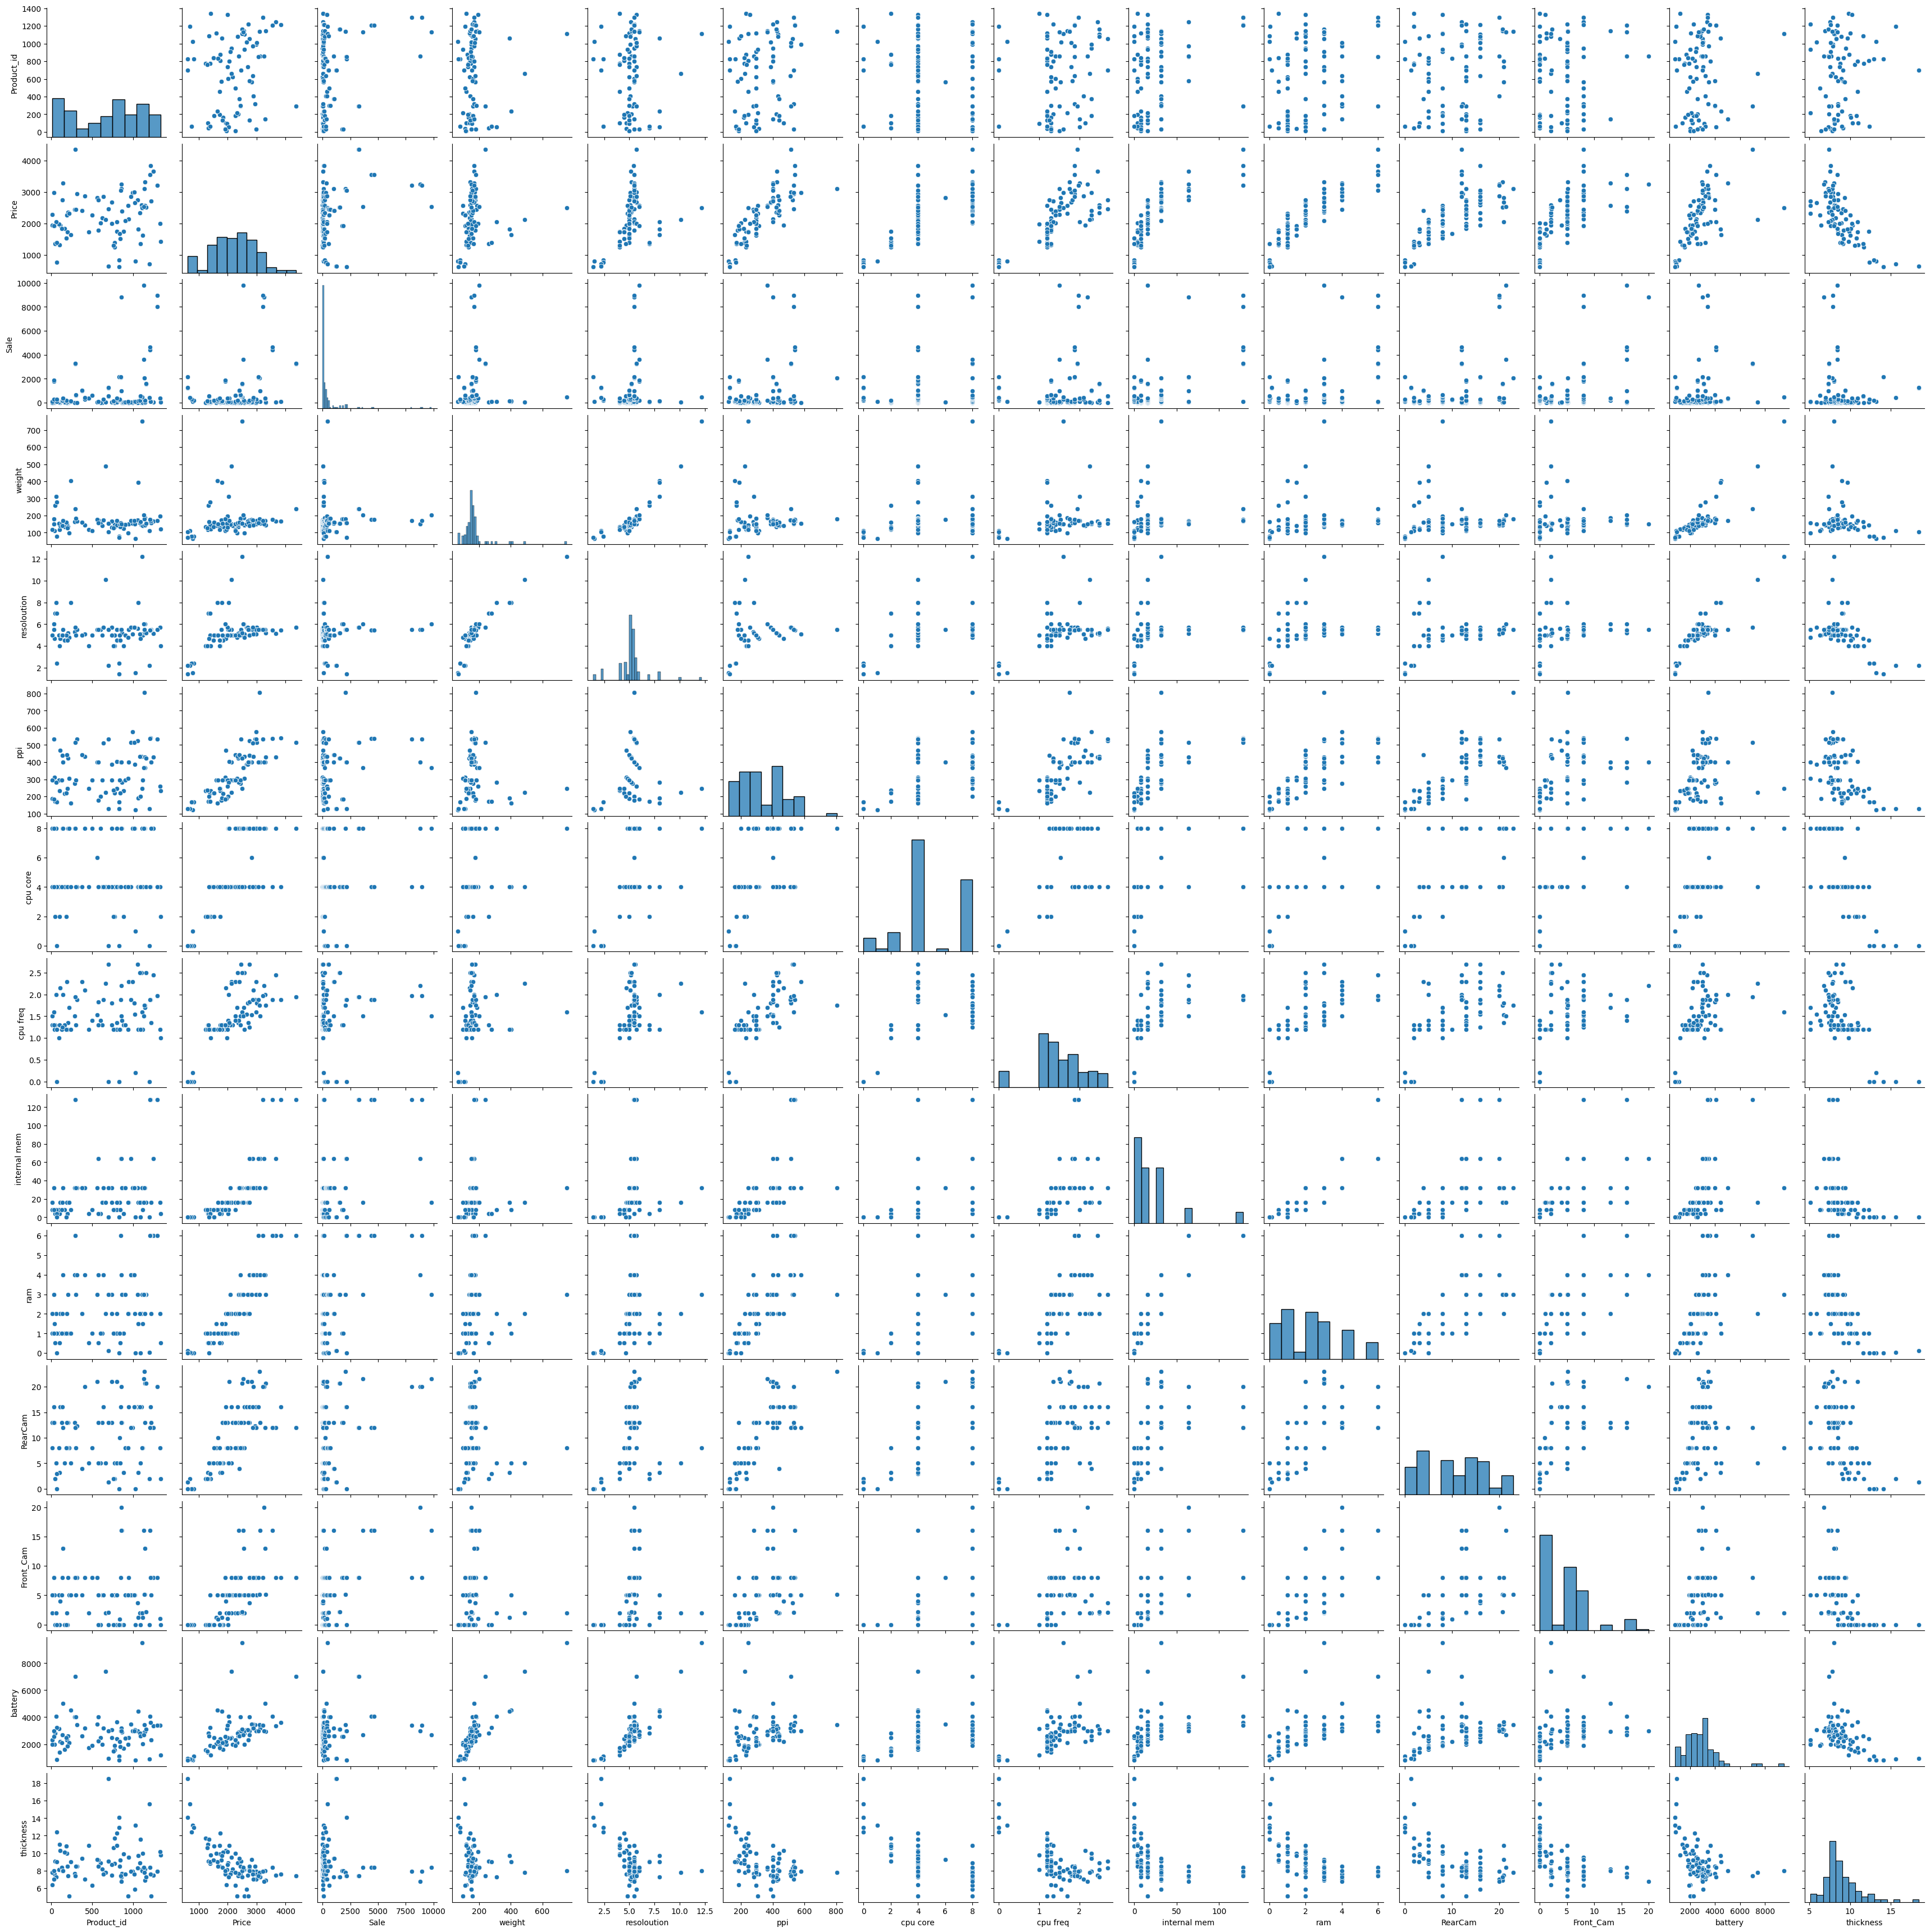

In [22]:
sns.pairplot(data)

The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown above

From the visulizations,we can deduce that almost all the features have a linear relationship

#### Checking correlation between features

In [30]:
import plotly.express as px
data = data.drop(columns = ['Product_id','Sale'])
corr = data.corr()
fig = px.imshow(corr, text_auto=True, width=1000, height=1000)
fig.show()

#### Split dataset into X and Y variables

In [31]:
x = data.drop('Price', axis = 1)
y = data['Price']

In [32]:
x.shape

(161, 11)

In [33]:
y.shape

(161,)

#### Perform 80/20 Data split

In common cases, the ratio used to split the data is 80:20. This is done so that the model don't see a particular set of data and is kept aside for testing the trained model. And the larger set is always used for training and the latter for testing.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### Checking data dimensions

In [35]:
x_train.shape, y_train.shape

((128, 11), (128,))

In [36]:
x_test.shape, y_test.shape

((33, 11), (33,))

#### Linear Regression Mode

In [37]:
# Import Linear Regression
from sklearn.metrics import mean_squared_error, r2_score

#### Build Linear Regression

In [38]:
# Define the regression model
model = linear_model.LinearRegression()

In [39]:
# Build training model
model.fit(x_train, y_train)

LinearRegression()

In [40]:
# Apply trained model to make prediction (on test set)
y_pred = model.predict(x_test)

#### Prediction Results

In [41]:
# Print model performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'% r2_score(y_test, y_pred))

Coefficients: [-5.74201064e-01 -6.65007219e+01  1.01564931e+00  5.45660023e+01
  1.70924453e+02  5.34483696e+00  9.16379714e+01  2.78314885e+00
  7.14963411e+00  1.21374152e-01 -6.96125505e+01]
Intercept: 1680.9104356715636
Mean squared error (MSE): 29806.92
Coefficient of determination (R^2): 0.95


`Conclusion`<br>
The Result for R^2 is 0.95 that is very good and showing that Linear regression model is Right Choice. It means that independent variables describe 95% of dependent variable!